<!--HEADER-->
*Tutorial sobre Flux.jl - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/TutorialFlux/blob/main/notebooks/03.00-Flux_neuronios.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/TutorialFlux/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252FTutorialFlux%26branch%3Dmain%26urlpath%3Dtree%252FTutorialFlux%252Fnotebooks/03.00-Flux_neuronios.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/TutorialFlux/blob/main/notebooks/slides/03.00-Flux_neuronios.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 2. Primeiros passos em Julia](02.00-Primeiros_passos_Julia.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [4. Redes neurais no Flux ->](04.00-Flux_redes_neurais.ipynb)

---


# Neurônios no Flux.jl

* O `Flux.jl` tem ferramentas para **construir** e **treinar** *redes neurais*.

* No treinamento, o `Flux.jl` trata uma rede neural apenas como uma **função com parâmetros a serem treinados**.

* De fato, podemos utilizar funções definidas de outras maneiras que não às através das suas ferramentas.

* Um dos objetivos do `Flux.jl` é o de *facilitar* a construção de **redes ou camadas clássicas**, *permitindo*, também, a utilização de **redes ou camadas compostas de funções construídas pelo usuário**.

* Vamos começar, neste caderno, vendo como construir neurônios com o `Flux.jl`.

In [1]:
using LinearAlgebra: ⋅
using Flux
using Plots
using ChainPlot

## Perceptron com dois sinais de entrada

* Vamos começar com um **percetron**, o *bloco-construtor* da rede neural de perceptrons originalmente proposta por [Frank Rosemblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), nos anos 1950-1960.

* Pra começar, um **perceptron de duas entradas** é uma função que recebe dois sinais (valores) $x_1$ e $x_2$ e que, de acordo com **pesos** $w_1, w_2$ e de um **limiar** $r$, retorna um valor $0$ ou $1$.

* A regra associada a esses parâmetros é
$$
  \text{saída} = 
    \begin{cases}
      0, & \displaystyle \text{se } w_1x_1 + w_2x_2 \leq r, \\
      1, & \displaystyle \text{se }  w_1x_1 + w_2x_2 > r.
    \end{cases}
$$

* Ou seja, o *neurônio* é **ativado** se o sinal ponderado $w_1x_1 + w_2x_2$ está **acima do limiar**, caso contrário, ele não é ativado.

## Perceptrons com múltiplos sinais de entrada

* Isso pode ser generalizado para um número arbitrário de sinais de entrada $x_1,\ldots,x_n$, com pesos $w_1, \ldots, w_n$.

* E atualmente se usa $b=-r$, denominado **viés**, de forma que o sinal de saída fica sendo
$$
  \text{saída} = 
    \begin{cases}
      0, & \displaystyle \text{se } \sum_{i=1}^n w_ix_i + b \leq 0, \\
      1, & \displaystyle \text{se }  \sum_{i=1}^n w_ix_i + b > 0.
    \end{cases}
$$

* Isso pode ser escrito de uma forma mais compacta com uma **função de ativação**
$$ h(s) = \max\{0,\operatorname{sgn}(x)\} = \begin{cases} 1, & s>0 \\ 0, & s\leq 0 \end{cases}
$$

* De modo que
$$ \text{saída} = h\left(w_1x_1 + \ldots + w_nx_n + b\right).
$$

## Implementando um perceptron no julia

* Isso pode ser facilmente implementado em `julia` e no `Flux.jl`:

In [2]:
n = 2                      # número de entradas
W = [0.6 0.8]              # pesos
b = 1.0                    # viés
h(s) = ifelse(s>0.0, 1.0, 0.0)   # função de ativação

l(x) = h(W⋅x + b)         # perceptron

l (generic function with 1 method)

* A função de ativação tem a forma

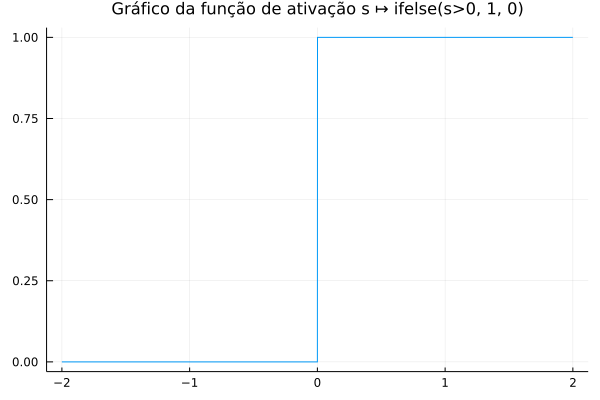

In [3]:
plot(-2:0.001:2, h, legend=false,
    title="Gráfico da função de ativação s ↦ ifelse(s>0, 1, 0)", titlefont=11)

* Com o peso ponderado, temos um comportamento análogo, só que em várias dimensões

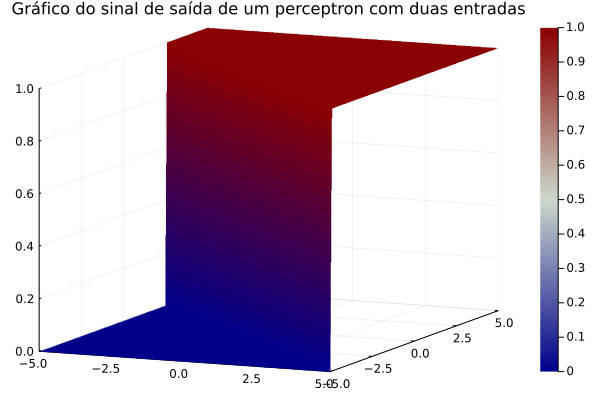

In [4]:
surface(-5:0.1:5, -5:0.1:5, (x,y) -> l([x,y]), c=:bluesreds,
    title="Gráfico do sinal de saída de um perceptron com duas entradas",
    titlefont=11)

## Redes de perceptrons.

* A função de ativação do perceptron é perfeita para representar circuitos digitais.
* De fato, redes de perceptrons podem ser estruturadas para fazer qualquer operação booleana (AND, NOT, OR, XOR, NAND, etc...)
* E junto com isso, qualquer operação aritmética binária (adição, subtração, multiplicação, divisão).
* Redes de perceptrons são obtidas encadeando-se diversos perceptrons como acima, com uma ou mais entradas.
* Mas isso deve ser construído explicitamente.
* Redes de perceptrons não são boas de se *treinar*:
  * Sendo constante por parte, o seu gradiente é nulo quase sempre, então não podemos utilizar métodos clássicos de otimização.
* Para isso, precisamos de funções de ativação suaves.

## Outras funções de ativação

* Há várias outras funções de ativação comumente utilizadas, com as características de
    * ser suave;
    * variar entre um sinal de saída "baixo" e um "alto"."
* Podemos definir essas funções explicitamente, ou pegar emprestado diretamente do `Flux.jl`.
* Aqui a lista de [funções de ativação](https://fluxml.ai/Flux.jl/stable/models/nnlib/#Activation-Functions-1) pelo pacote [FluxML/NNlib.jl](https://github.com/FluxML/NNlib.jl) e utilizadas (reexportadas) pelo `Flux.jl`.
* Podemos acessar os códigos de implementação dessas funções de ativação em [NNlib.jl/src/activations.jl](https://github.com/FluxML/NNlib.jl/blob/master/src/activations.jl).
* A lista delas está acessível na constante `NNlib.ACTIVATIONS`:

In [5]:
NNlib.ACTIVATIONS

21-element Vector{Symbol}:
 :σ
 :hardσ
 :hardtanh
 :relu
 :leakyrelu
 :relu6
 :rrelu
 :elu
 :gelu
 :swish
 :selu
 :celu
 :softplus
 :softsign
 :logσ
 :logcosh
 :mish
 :tanhshrink
 :softshrink
 :trelu
 :lisht

* Uma das mais conhecidas é a sigmoid:
$$ σ(x) = \frac{1}{1 + exp(-x)}.
$$

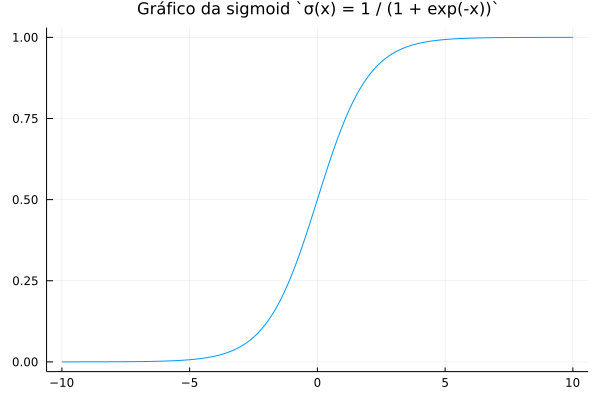

In [6]:
plot(-10:0.1:10, NNlib.σ, legend=false,
    title="Gráfico da sigmoid `σ(x) = 1 / (1 + exp(-x))`", titlefont=11)

## Visualizando todas as funções de ativação

In [7]:
ativacoes = hcat([getproperty(NNlib, ativacao).(-10:0.1:10) for ativacao in NNlib.ACTIVATIONS[1:end]]...)

201×21 Matrix{Float64}:
 4.53979e-5   0.0  -1.0   0.0  -0.1    0.0  …  -9.0  -9.5   0.0  10.0
 5.01722e-5   0.0  -1.0   0.0  -0.099  0.0     -8.9  -9.4   0.0   9.9
 5.54485e-5   0.0  -1.0   0.0  -0.098  0.0     -8.8  -9.3   0.0   9.8
 6.12797e-5   0.0  -1.0   0.0  -0.097  0.0     -8.7  -9.2   0.0   9.7
 6.77241e-5   0.0  -1.0   0.0  -0.096  0.0     -8.6  -9.1   0.0   9.6
 7.48462e-5   0.0  -1.0   0.0  -0.095  0.0  …  -8.5  -9.0   0.0   9.5
 8.27172e-5   0.0  -1.0   0.0  -0.094  0.0     -8.4  -8.9   0.0   9.4
 9.14159e-5   0.0  -1.0   0.0  -0.093  0.0     -8.3  -8.8   0.0   9.3
 0.000101029  0.0  -1.0   0.0  -0.092  0.0     -8.2  -8.7   0.0   9.2
 0.000111653  0.0  -1.0   0.0  -0.091  0.0     -8.1  -8.6   0.0   9.1
 0.000123395  0.0  -1.0   0.0  -0.09   0.0  …  -8.0  -8.5   0.0   9.0
 0.00013637   0.0  -1.0   0.0  -0.089  0.0     -7.9  -8.4   0.0   8.9
 0.00015071   0.0  -1.0   0.0  -0.088  0.0     -7.8  -8.3   0.0   8.8
 ⋮                                     ⋮    ⋱                     

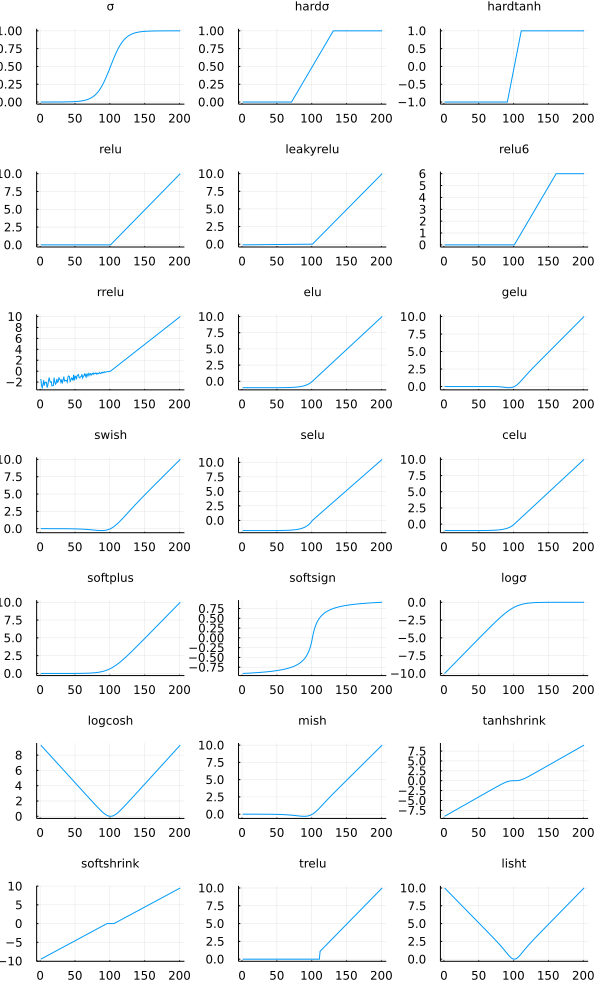

In [8]:
ncols = 3
nlinhas = divrem(length(NNlib.ACTIVATIONS), ncols) |> drn -> drn[1] + sign(drn[2])
plot(ativacoes, layout = grid(nlinhas, ncols), legend=false, size=(600,1000),
    title=hcat(NNlib.ACTIVATIONS...), titlefont=8)

## Outros neurônios

* Agora podemos compor uma função de ativação $f:\mathbb{R}\rightarrow \mathbb{R}$ qualquer

* Com a média ponderada $w_1x_1 + \ldots + w_nx_n$ dos sinais de entrada

* Para formar um neurônio
$$ (x_1, \ldots, x_n) \mapsto f(w_1x_1 + \ldots + w_nx_n).
$$

* Isso pode ser feito explicitamente como acima.

* Ou com o `Dense()` do `Flux.jl`.

In [9]:
n = 2
m = Dense(n, 1)

Dense(2, 1)

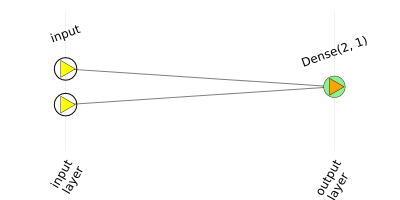

In [10]:
plot(m, size=(400, 200))

## Sobre o `Dense`

* `Dense` é um conjunto de "coisas", de acordo com a filosofia de *múltiplo despachos* do julia.

* `Dense` é um **struct** (ou "tipo composto"), que armazena uma *matriz de pesos*, o *viés* e *função de ativação*, representando, assim, um tipo de neurônio.

* `Dense` são vários **inner and outer constructors** (ou "construtores internos e externos"), que servem para criar uma instância do *struct* `Dense` de maneiras diferentes.

* `Dense` também acarreta na definição de um método que "avalia" a ação de uma instância do struct nos sinais de entrada (a ação do neurônio em si).

In [11]:
fieldnames(Dense) # nomes dos campos do tipo composto 

(:weight, :bias, :σ)

In [12]:
methods(Dense) # métodos para a construção do tipo composto

# 5 methods for type constructor:
[1] Dense(in::Integer, out::Integer) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:122
[2] Dense(in::Integer, out::Integer, σ; initW, initb, init, bias) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:122
[3] Dense(W::M) where M<:(AbstractMatrix{T} where T) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:116
[4] Dense(W::M, bias) where M<:(AbstractMatrix{T} where T) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:116
[5] Dense(W::M, bias, σ::F) where {M<:(AbstractMatrix{T} where T), F} in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:116

In [13]:
methods(m) # métodos definidos 

# 2 methods:
[1] (a::Dense)(x::AbstractVecOrMat{T} where T) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:145
[2] (a::Dense)(x::AbstractArray) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:150

In [14]:
methodswith(Dense)

[1] show(io::IO, l::Dense) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:153
[2] getproperty(a::Dense, s::Symbol) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/deprecations.jl:11

In [15]:
?Dense()

```
Dense(in, out, σ=identity; bias=true, init=glorot_uniform)
Dense(W::AbstractMatrix, [bias, σ])
```

Create a traditional `Dense` layer, whose forward pass is given by:

```
y = σ.(W * x .+ bias)
```

The input `x` should be a vector of length `in`, or batch of vectors represented as an `in × N` matrix, or any array with `size(x,1) == in`. The out `y` will be a vector  of length `out`, or a batch with `size(y) == (out, size(x)[2:end]...)`

Keyword `bias=false` will switch off trainable bias for the layer. The initialisation of the weight matrix is `W = init(out, in)`, calling the function given to keyword `init`, with default [`glorot_uniform`](@doc Flux.glorot_uniform). The weight matrix and/or the bias vector (of length `out`) may also be provided explicitly.

# Examples

```jldoctest
julia> d = Dense(5, 2)
Dense(5, 2)

julia> d(rand(Float32, 5, 64)) |> size
(2, 64)

julia> d(rand(Float32, 5, 1, 1, 64)) |> size  # treated as three batch dimensions
(2, 1, 1, 64)

julia> d1 = Dense(ones(2, 5), false, tanh)  # using provided weight matrix
Dense(5, 2, tanh; bias=false)

julia> d1(ones(5))
2-element Vector{Float64}:
 0.9999092042625951
 0.9999092042625951

julia> Flux.params(d1)  # no trainable bias
Params([[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0]])
```


In [16]:
@which Dense(2,1)

Dense(in::Integer, out::Integer) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:122

* Código fonte para `Flux.Dense` em [src/basic.jl#L71](https://github.com/FluxML/Flux.jl/blob/master/src/layers/basic.jl#L71), no repositório do `Flux.jl`.

## Diferenças sobre a nossa implementação

* A nossa definição foi

```julia
l(x) = h(W⋅x + b)
```

* A definição para uma instância do `Dense` é (obtido de [src/basic.jl#L71](https://github.com/FluxML/Flux.jl/blob/master/src/layers/basic.jl#L71))

```julia
function (a::Dense)(x::AbstractVecOrMat)
  W, b, σ = a.weight, a.bias, a.σ
  return σ.(W*x .+ b)
end
```

* **Observação 1:** No *struct* do dense, `σ` é o nome do campo que guarda a função de ativação do neurônio, que pode ser qualquer uma, não apenas a sigmóide `σ`, importada de `NNLib.σ`.

* **Observação 2:** Veja o uso da operação matricial `W*x` e do operador `.`, que permitem aplicar o neurônio em uma matriz, como em lotes.

* **Observação 3:** Por conta dessas últimas, a saída do neurônio é um vetor, não um escalar, mesmo que seja de um único elemento.

<!--NAVIGATOR-->

---
[<- 2. Primeiros passos em Julia](02.00-Primeiros_passos_Julia.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [4. Redes neurais no Flux ->](04.00-Flux_redes_neurais.ipynb)